In [24]:
#This project aims to build a linear regression model that can predict customer churn in a telecom
#company. The dataset used for this project is the &quot;Telco Customer Churn&quot; dataset which contains
#information about various customer factors such as tenure, monthly charges, etc. This project
#includes data preprocessing, data visualization, and prediction using linear regression.

import numpy as np
import pandas as pd

In [2]:
#The first step in data preprocessing is to load the dataset into a pandas dataframe.


TCC =pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.CSV')

In [3]:
TCC

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#The next step is to check for any missing or null values in the dataset.

print(TCC.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
TCC['PaymentMethod'] = TCC['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [6]:
TCC

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
TCC.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#The categorical features are converted into numerical features using one-hot encoding.

import sklearn
from sklearn.preprocessing import OneHotEncoder

In [9]:
encoder = OneHotEncoder(sparse=False)

In [10]:
columns_to_encode = TCC[['Partner','Dependents','PhoneService','OnlineSecurity','DeviceProtection','StreamingTV','StreamingMovies','PaperlessBilling']]

In [11]:
transformed_data = encoder.fit_transform(columns_to_encode)

In [12]:
encoded_data = pd.DataFrame(transformed_data, index=columns_to_encode.index)

In [13]:
encoded_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7039,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7040,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7041,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
concatenated_data = pd.concat([columns_to_encode, encoded_data], axis=1)

In [15]:
concatenated_data

,Partner,Dependents,PhoneService,OnlineSecurity,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling,0,1,...,10,11,12,13,14,15,16,17,18,19
0,Yes,No,No,No,No,No,No,Yes,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,No,No,Yes,Yes,Yes,No,No,No,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,No,No,Yes,Yes,No,No,No,Yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,No,No,No,Yes,Yes,No,No,No,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,No,No,Yes,No,No,No,No,Yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7039,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7040,Yes,Yes,No,Yes,No,No,No,Yes,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7041,Yes,No,Yes,No,No,No,No,Yes,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
TCC['Partner'] = encoder.fit_transform(TCC[['Partner']])
TCC['Dependents'] = encoder.fit_transform(TCC[['Dependents']])
TCC['PhoneService'] = encoder.fit_transform(TCC[['PhoneService']])
TCC['OnlineSecurity'] = encoder.fit_transform(TCC[['OnlineSecurity']])
TCC['DeviceProtection'] = encoder.fit_transform(TCC[['DeviceProtection']])
TCC['StreamingTV'] = encoder.fit_transform(TCC[['StreamingTV']])
TCC['StreamingMovies'] = encoder.fit_transform(TCC[['StreamingMovies']])
TCC['PaperlessBilling'] = encoder.fit_transform(TCC[['PaperlessBilling']])

In [17]:
TCC

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,0.0,1.0,1,1.0,No phone service,DSL,1.0,...,1.0,No,1.0,1.0,Month-to-month,0.0,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,1.0,1.0,34,0.0,No,DSL,0.0,...,0.0,No,1.0,1.0,One year,1.0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,1.0,1.0,2,0.0,No,DSL,0.0,...,1.0,No,1.0,1.0,Month-to-month,0.0,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,1.0,1.0,45,1.0,No phone service,DSL,0.0,...,0.0,Yes,1.0,1.0,One year,1.0,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,1.0,1.0,2,0.0,No,Fiber optic,1.0,...,1.0,No,1.0,1.0,Month-to-month,0.0,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,0.0,0.0,24,0.0,Yes,DSL,0.0,...,0.0,Yes,0.0,0.0,One year,0.0,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,0.0,0.0,72,0.0,Yes,Fiber optic,1.0,...,0.0,No,0.0,0.0,One year,0.0,Credit card,103.20,7362.9,No
7040,4801-JZAZL,Female,0,0.0,0.0,11,1.0,No phone service,DSL,0.0,...,1.0,No,1.0,1.0,Month-to-month,0.0,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,0.0,1.0,4,0.0,Yes,Fiber optic,1.0,...,1.0,No,1.0,1.0,Month-to-month,0.0,Mailed check,74.40,306.6,Yes


In [18]:
#The dataset is then split into the feature set and the target set.

column_to_encode = TCC[['Churn']]
TCC['Churn'] = encoder.fit_transform(TCC[['Churn']])
Target =TCC['Churn']

In [19]:
Feature = TCC[['Partner','Dependents','PhoneService','OnlineSecurity','DeviceProtection','StreamingTV','StreamingMovies','PaperlessBilling']]


In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Boolean Selection Between Yes or No for a Customer')

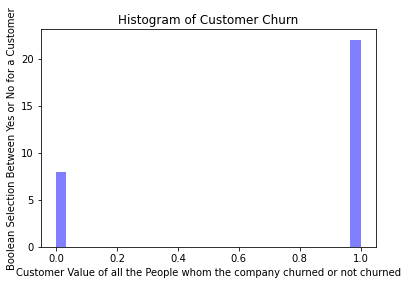

In [22]:
#The first visualization is a histogram of the target variable, which is the customer churn.

plt.hist(Target, bins=30, density=True, alpha=0.5, color='blue')
plt.title('Histogram of Customer Churn')
plt.xlabel("Customer Value of all the People whom the company churned or not churned")
plt.ylabel("Boolean Selection Between Yes or No for a Customer")

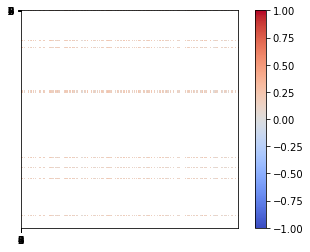

In [25]:
#The second visualization is a correlation matrix of all the features in the dataset. This helps
#us to identify the features that are highly correlated with the target variable.

CRM = np.corrcoef(Feature)
plt.imshow(CRM, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
SCFIT = scaling.fit_transform(Feature[['Partner','Dependents','PhoneService','OnlineSecurity','DeviceProtection','StreamingTV','StreamingMovies','PaperlessBilling']])

Text(0, 0.5, 'Churn Value')

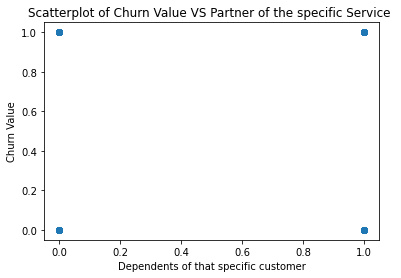

In [53]:
#The third visualization is a scatter plot between the highly correlated features and the target
#variable. This helps us to identify any linear relationships between the features and the target
#variable.

plt.scatter(TCC['Partner'],Target)
plt.title('Scatterplot of Churn Value VS Partner of the specific Service ')
plt.xlabel('Partner of the Service')
plt.ylabel("Churn Value")

Text(0, 0.5, 'Churn Value')

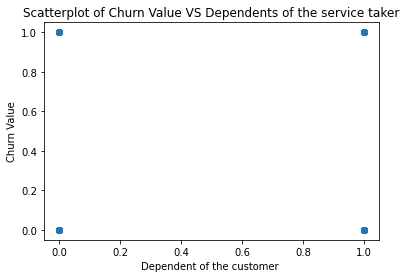

In [55]:
plt.scatter(TCC['Dependents'],Target)
plt.title('Scatterplot of Churn Value VS Dependents of the service taker')
plt.xlabel('Dependent of the customer ')
plt.ylabel("Churn Value")

Text(0, 0.5, 'Churn Value')

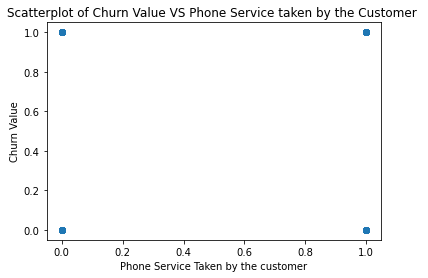

In [56]:
plt.scatter(TCC['PhoneService'],Target)
plt.title('Scatterplot of Churn Value VS Phone Service taken by the Customer ')
plt.xlabel('Phone Service Taken by the customer')
plt.ylabel("Churn Value")

In [36]:
#The feature set and the target set are split into training and testing sets.

from sklearn.model_selection import train_test_split


#The linear regression model is trained on the training set.


X_train, X_test, y_train, y_test = train_test_split(Feature,Target, test_size=0.2)

In [37]:
X_train

,Partner,Dependents,PhoneService,OnlineSecurity,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling
229,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5050,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4587,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
6825,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
5262,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
925,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
754,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2572,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
X_test

,Partner,Dependents,PhoneService,OnlineSecurity,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling
1204,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4839,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1669,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
429,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
574,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6488,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
6432,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5065,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
y_train

229     1.0
6213    1.0
5050    0.0
4587    1.0
6825    1.0
       ... 
5262    1.0
925     1.0
754     1.0
2572    1.0
4511    1.0
Name: Churn, Length: 5634, dtype: float64

In [40]:
y_test

1204    1.0
4839    0.0
1669    1.0
429     1.0
574     1.0
       ... 
6488    0.0
6432    1.0
530     1.0
5065    1.0
4382    1.0
Name: Churn, Length: 1409, dtype: float64

In [41]:
#The model is then used to predict the customer churn for new data points.


from sklearn.linear_model import LinearRegression

In [42]:
CLFLR = LinearRegression()

In [43]:
CLFLR.fit(X_train,y_train)

LinearRegression()

In [44]:
CLFLR.predict(X_test)

array([0.72487849, 0.55534398, 0.47475622, ..., 0.930533  , 0.81701005,
       0.55534398])

In [45]:
y_test

1204    1.0
4839    0.0
1669    1.0
429     1.0
574     1.0
       ... 
6488    0.0
6432    1.0
530     1.0
5065    1.0
4382    1.0
Name: Churn, Length: 1409, dtype: float64

In [46]:
CLFLR.score(X_test,y_test)

0.14119240009362366

In [47]:
from sklearn.metrics import mean_squared_error
y_train

229     1.0
6213    1.0
5050    0.0
4587    1.0
6825    1.0
       ... 
5262    1.0
925     1.0
754     1.0
2572    1.0
4511    1.0
Name: Churn, Length: 5634, dtype: float64

In [48]:
#The model is then evaluated on the testing set using the mean squared error (MSE) and the
#R-squared score.


MSEOD = mean_squared_error(CLFLR.predict(X_test),y_test)
print("Mean squared error:", MSEOD)

Mean squared error: 0.17245703404660379


In [49]:
from sklearn.metrics import r2_score

In [50]:
RSQES = r2_score(CLFLR.predict(X_test),y_test)
print("R squared error:", RSQES)

R squared error: -4.577659623992596


Text(0, 0.5, 'Churn Value')

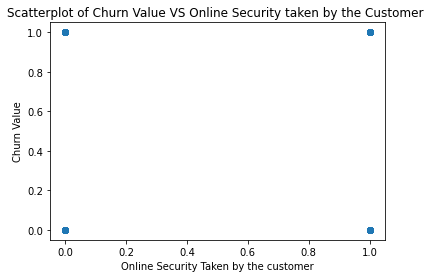

In [57]:
plt.scatter(TCC['OnlineSecurity'],Target)
plt.title('Scatterplot of Churn Value VS Online Security taken by the Customer ')
plt.xlabel('Online Security Taken by the customer')
plt.ylabel("Churn Value")

Text(0, 0.5, 'Churn Value')

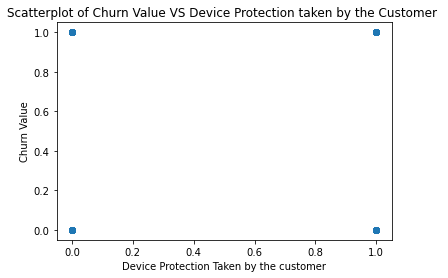

In [58]:
plt.scatter(TCC['DeviceProtection'],Target)
plt.title('Scatterplot of Churn Value VS Device Protection taken by the Customer ')
plt.xlabel('Device Protection Taken by the customer')
plt.ylabel("Churn Value")

Text(0, 0.5, 'Churn Value')

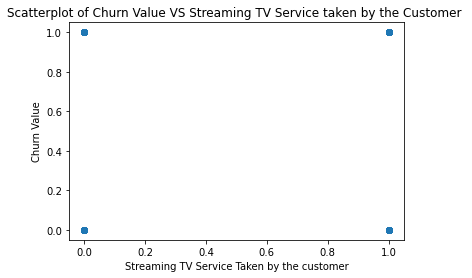

In [59]:
plt.scatter(TCC['StreamingTV'],Target)
plt.title('Scatterplot of Churn Value VS Streaming TV Service taken by the Customer ')
plt.xlabel('Streaming TV Service Taken by the customer')
plt.ylabel("Churn Value")

In [ ]:
#In this project, we have successfully built a linear regression model that can predict customer churn
#in a telecom company. The model was trained and tested on the &quot;Telco Customer Churn&quot; dataset
#using data preprocessing, data visualization, and linear regression techniques.